## Data Visualization

In this checkpoint you will be using a FIFA dataset of soccer player statistics to create a visualization, then also interpreting a visualization we have created.

First, we import the relevant libraries

In [ ]:
# Run this cell without changes
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
# __SOLUTION__
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we read data from a CSV and create `player_nationalities`, a list of dictionaries containing data about the number of FIFA soccer players from each country.  The countries are in random order.

This code also prints the first five dictionaries in `player_nationalities`, out of a total of 161

In [ ]:
# Run this cell without changes
player_nationalities = []
with open("data/player_nationalities.csv") as f:
    for row in csv.DictReader(f):
        row['count_of_players'] = int(row['count_of_players'])
        player_nationalities.append(dict(row))

for index in range(5):
    print(player_nationalities[index])

In [2]:
# __SOLUTION__
player_nationalities = []
with open("data/player_nationalities.csv") as f:
    for row in csv.DictReader(f):
        row['count_of_players'] = int(row['count_of_players'])
        player_nationalities.append(dict(row))
for index in range(5):
    print(player_nationalities[index])

{'country': 'Afghanistan', 'count_of_players': 4}
{'country': 'Croatia', 'count_of_players': 113}
{'country': 'Benin', 'count_of_players': 15}
{'country': 'Azerbaijan', 'count_of_players': 5}
{'country': 'Montenegro', 'count_of_players': 20}


**1) Find the top 10 countries with the most players. Create a bar chart showing the number of players in those 10 countries**

Don't forget to add a **title** and **y axis label** to your charts.

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the first 10 randomly ordered countries: `top10 = player_nationalities[:10]`

In [ ]:
# Code here to get the top 10 countries with the most players

In [3]:
# __SOLUTION__
ordered = sorted(player_nationalities, key=lambda x: x['count_of_players'], reverse=True)
top10 = ordered[:10]
top10

[{'country': 'England', 'count_of_players': 1475},
 {'country': 'Germany', 'count_of_players': 1151},
 {'country': 'Spain', 'count_of_players': 974},
 {'country': 'France', 'count_of_players': 853},
 {'country': 'Argentina', 'count_of_players': 833},
 {'country': 'Brazil', 'count_of_players': 788},
 {'country': 'Italy', 'count_of_players': 579},
 {'country': 'Colombia', 'count_of_players': 570},
 {'country': 'Japan', 'count_of_players': 455},
 {'country': 'Netherlands', 'count_of_players': 426}]

In [ ]:
# Code here to plot a bar chart.  A recommended figsize is (10, 6)

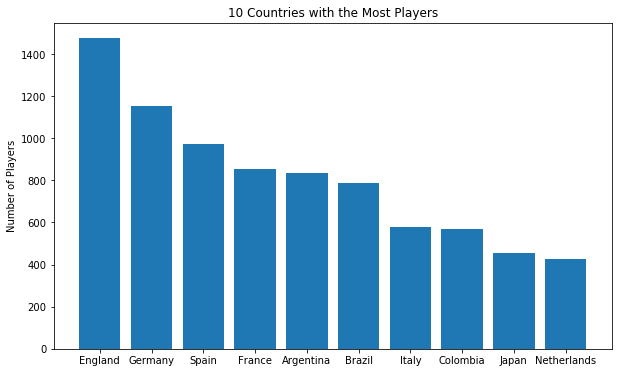

In [4]:
# __SOLUTION__
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("10 Countries with the Most Players")
ax.set_ylabel("Number of Players")

labels = [row['country'] for row in top10]
values = [row['count_of_players'] for row in top10]
ax.bar(labels, values);

**2) Below is code for a scatter plot for the player stats `Standing Tackle` and `Sliding Tackle`**

In [ ]:
# Run this cell without changes
player_stats = []
with open("data/player_stats.csv") as f:
    for row in csv.DictReader(f):
        row["standing_tackle"] = float(row["standing_tackle"])
        row["sliding_tackle"] = float(row["sliding_tackle"])
        player_stats.append(dict(row))
        
for index in range(5):
    print(player_stats[index])

In [5]:
# __SOLUTION__
player_stats = []
with open("data/player_stats.csv") as f:
    for row in csv.DictReader(f):
        row["standing_tackle"] = float(row["standing_tackle"])
        row["sliding_tackle"] = float(row["sliding_tackle"])
        player_stats.append(dict(row))
for index in range(5):
    print(player_stats[index])

{'standing_tackle': 28.0, 'sliding_tackle': 26.0}
{'standing_tackle': 31.0, 'sliding_tackle': 23.0}
{'standing_tackle': 24.0, 'sliding_tackle': 33.0}
{'standing_tackle': 21.0, 'sliding_tackle': 13.0}
{'standing_tackle': 58.0, 'sliding_tackle': 51.0}


In [ ]:
# Run this cell without changes
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = [row["standing_tackle"] for row in player_stats]
y = [row["sliding_tackle"] for row in player_stats]

ax.scatter(x, y, alpha=0.2);

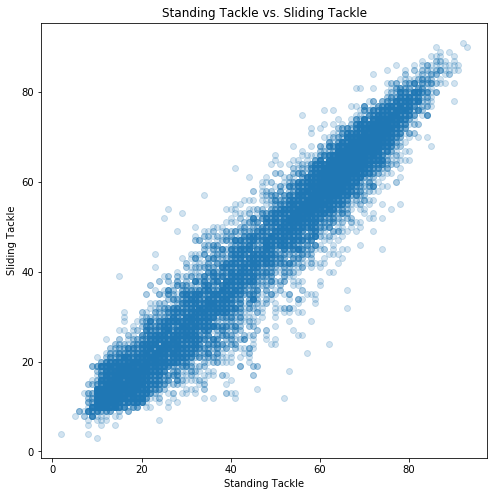

In [6]:
# __SOLUTION__
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')
x = [row["standing_tackle"] for row in player_stats]
y = [row["sliding_tackle"] for row in player_stats]
ax.scatter(x, y, alpha=0.2);

**How would you describe the relationship between these two features?**

In [ ]:
# Your written answer here

In [ ]:
# __SOLUTION__
# These two features are highly correlated.